In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("letter-recognition.data")
print(df)

      letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0          T      2      8      3     5      1      8     13      0      6   
1          I      5     12      3     7      2     10      5      5      4   
2          D      4     11      6     8      6     10      6      2      6   
3          N      7     11      6     6      3      5      9      4      6   
4          G      2      1      3     1      1      8      6      6      6   
...      ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
19995      D      2      2      3     3      2      7      7      7      6   
19996      C      7     10      8     8      4      4      8      6      9   
19997      T      6      9      6     7      5      6     11      3      7   
19998      S      2      3      4     2      1      8      7      2      6   
19999      A      4      9      6     6      2      9      5      3      1   

       xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     

In [4]:
df.shape

(20000, 17)

In [5]:
df

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [7]:
df.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [8]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [9]:
Train,  Test=TTS(df,test_size=0.25,random_state=4)

In [10]:
Train

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
11396,G,5,11,7,8,8,7,6,7,3,7,6,10,5,8,8,8
5140,K,6,11,9,8,7,6,6,1,6,9,6,10,5,7,5,8
13075,K,3,4,6,3,3,6,7,2,7,10,7,10,3,8,3,7
1673,B,7,12,6,6,4,8,6,4,5,10,5,8,6,7,7,10
1105,N,3,7,4,5,3,7,7,12,1,6,6,8,5,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16840,S,3,4,3,2,2,8,8,6,5,7,6,7,2,8,9,8
11863,W,10,13,10,8,5,5,9,2,2,7,10,7,9,12,1,6
17093,A,4,9,6,6,2,7,6,3,1,7,0,8,3,7,2,8
8366,X,3,7,5,5,4,8,6,3,5,6,7,8,2,9,8,9


In [11]:
Test

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1919,D,5,10,6,8,6,7,7,7,7,7,6,5,3,8,3,7
6624,R,6,9,9,8,10,5,9,4,4,6,4,10,10,5,9,9
3858,H,5,8,8,6,5,5,9,4,6,10,10,9,4,9,4,6
5053,E,4,9,6,7,5,7,7,2,7,11,7,9,3,8,4,8
8745,V,5,11,8,8,2,8,8,5,3,6,14,8,3,9,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,R,5,9,5,4,4,8,7,3,4,9,4,8,5,8,6,8
216,A,3,5,5,7,2,7,7,3,1,6,0,8,3,7,1,8
5612,L,4,10,5,7,4,4,4,3,8,2,1,7,0,6,1,6
5412,G,4,9,5,6,2,7,6,8,8,6,5,10,2,8,5,11


In [12]:
Train.shape







(15000, 17)

In [13]:
Test.shape

(5000, 17)

In [14]:
X_train=Train.drop(['letter'],axis=1)

In [15]:
X_train.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
11396,5,11,7,8,8,7,6,7,3,7,6,10,5,8,8,8
5140,6,11,9,8,7,6,6,1,6,9,6,10,5,7,5,8
13075,3,4,6,3,3,6,7,2,7,10,7,10,3,8,3,7
1673,7,12,6,6,4,8,6,4,5,10,5,8,6,7,7,10
1105,3,7,4,5,3,7,7,12,1,6,6,8,5,8,0,8


In [16]:
T_train=Train['letter']

In [17]:
T_train.head()

11396    G
5140     K
13075    K
1673     B
1105     N
Name: letter, dtype: object

In [18]:
X_test=Test.drop(['letter'],axis=1)

In [19]:
X_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1919,5,10,6,8,6,7,7,7,7,7,6,5,3,8,3,7
6624,6,9,9,8,10,5,9,4,4,6,4,10,10,5,9,9
3858,5,8,8,6,5,5,9,4,6,10,10,9,4,9,4,6
5053,4,9,6,7,5,7,7,2,7,11,7,9,3,8,4,8
8745,5,11,8,8,2,8,8,5,3,6,14,8,3,9,0,8


In [20]:
T_test=Test['letter']

In [21]:
T_test.head()

1919    D
6624    R
3858    H
5053    E
8745    V
Name: letter, dtype: object

# Normalisation of Training and Test Data


# 1.Standard Scaling

In [22]:
scaled_X = StandardScaler().fit_transform(X_train.values)

In [23]:
X_train_ss = pd.DataFrame(scaled_X, index = X_train.index, columns = X_train.columns)

In [24]:
X_train_ss.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,1.365160e-15,-1.005655e-15,-1.251917e-15,-1.199056e-15,4.006425e-16,-8.859876e-16,-4.208633e-16,5.156616e-17,-5.448234e-17,-4.165261e-16,-6.512753e-17,3.798369e-16,-8.896587e-17,3.489061e-16,-1.324163e-16,-2.953304e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.096512e+00,-2.131113e+00,-2.545027e+00,-2.383907e+00,-1.598335e+00,-3.384744e+00,-3.219047e+00,-1.715889e+00,-2.176671e+00,-3.313236e+00,-2.458709e+00,-3.798641e+00,-1.300285e+00,-5.406245e+00,-1.434557e+00,-4.819492e+00
25%,-5.367362e-01,-6.214556e-01,-5.607552e-01,-6.104305e-01,-6.881385e-01,-4.390122e-01,-6.481057e-01,-6.037775e-01,-4.977022e-01,-5.158173e-01,-5.519645e-01,-4.372101e-01,-8.738315e-01,-2.304522e-01,-6.584635e-01,-4.940851e-01
50%,-1.681092e-02,-1.759254e-02,-6.468726e-02,2.763076e-01,-2.330405e-01,5.194307e-02,-2.196155e-01,-2.330738e-01,-7.796010e-02,-1.161861e-01,-1.706155e-01,4.299430e-02,-2.092465e-02,-2.304522e-01,-2.704168e-01,1.238302e-01
75%,5.031144e-01,5.862705e-01,4.313807e-01,7.196766e-01,6.771555e-01,5.428983e-01,6.373648e-01,5.083337e-01,7.615241e-01,6.830763e-01,5.920824e-01,5.231987e-01,4.055288e-01,4.165220e-01,5.056766e-01,7.417455e-01
max,5.702367e+00,2.397860e+00,4.895992e+00,4.266629e+00,5.228135e+00,3.979585e+00,3.208306e+00,3.844667e+00,4.119461e+00,2.681232e+00,3.261525e+00,3.404425e+00,5.096516e+00,4.298367e+00,4.386144e+00,4.449237e+00


# 2. Min-Max Scaling

In [25]:
scaled_train = MinMaxScaler().fit_transform(X_train.values)

In [26]:
X_train_s = pd.DataFrame(scaled_train, index = X_train.index, columns=X_train.columns)

In [27]:
X_train_s.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.268822,0.470551,0.342027,0.358453,0.234138,0.459613,0.500836,0.308582,0.345716,0.552716,0.429827,0.527364,0.203271,0.557080,0.246458,0.519973
std,0.128228,0.220808,0.134395,0.150369,0.146493,0.135794,0.155590,0.179844,0.158833,0.166826,0.174824,0.138834,0.156333,0.103047,0.171806,0.107893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.333333,0.266667,0.266667,0.133333,0.400000,0.400000,0.200000,0.266667,0.466667,0.333333,0.466667,0.066667,0.533333,0.133333,0.466667
50%,0.266667,0.466667,0.333333,0.400000,0.200000,0.466667,0.466667,0.266667,0.333333,0.533333,0.400000,0.533333,0.200000,0.533333,0.200000,0.533333
75%,0.333333,0.600000,0.400000,0.466667,0.333333,0.533333,0.600000,0.400000,0.466667,0.666667,0.533333,0.600000,0.266667,0.600000,0.333333,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
scaled_test=MinMaxScaler().fit_transform(X_test.values)

In [29]:
X_test_s=pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)

In [30]:
X_test_s.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.307477,0.464480,0.364014,0.382814,0.232480,0.460520,0.497613,0.308547,0.343827,0.550400,0.431587,0.498900,0.216943,0.560523,0.245093,0.557571
std,0.144785,0.218743,0.143608,0.162789,0.144640,0.132881,0.153301,0.180476,0.158394,0.163088,0.177147,0.148152,0.163926,0.119135,0.169131,0.115345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.333333,0.285714,0.285714,0.133333,0.400000,0.400000,0.200000,0.266667,0.466667,0.333333,0.428571,0.142857,0.538462,0.133333,0.500000
50%,0.307692,0.466667,0.357143,0.428571,0.200000,0.466667,0.466667,0.266667,0.333333,0.533333,0.400000,0.500000,0.214286,0.538462,0.200000,0.571429
75%,0.384615,0.600000,0.428571,0.500000,0.333333,0.533333,0.533333,0.400000,0.466667,0.666667,0.533333,0.571429,0.285714,0.615385,0.333333,0.571429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Different Kinds of Plots

<AxesSubplot:ylabel='letter'>

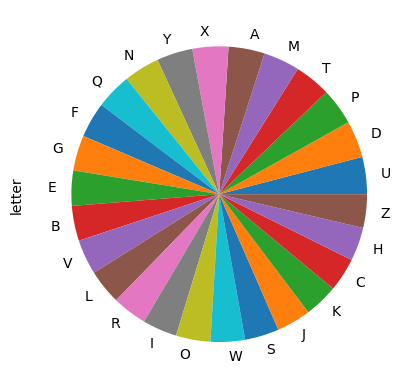

In [31]:
df['letter'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='letter'>

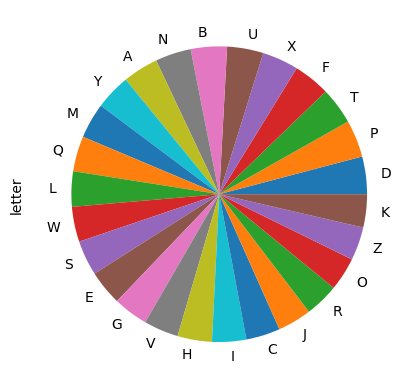

In [32]:
T_train.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='letter'>

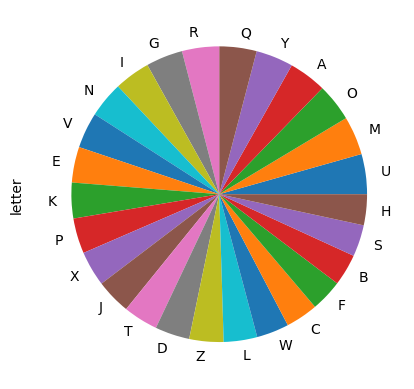

In [33]:
T_test.value_counts().plot(kind='pie')  

# In further proceeding we will calculate influence of each attribute on Letter in ascending order and drop the least important attribute(s)

Text(0.5, 1.0, 'Yegvx')

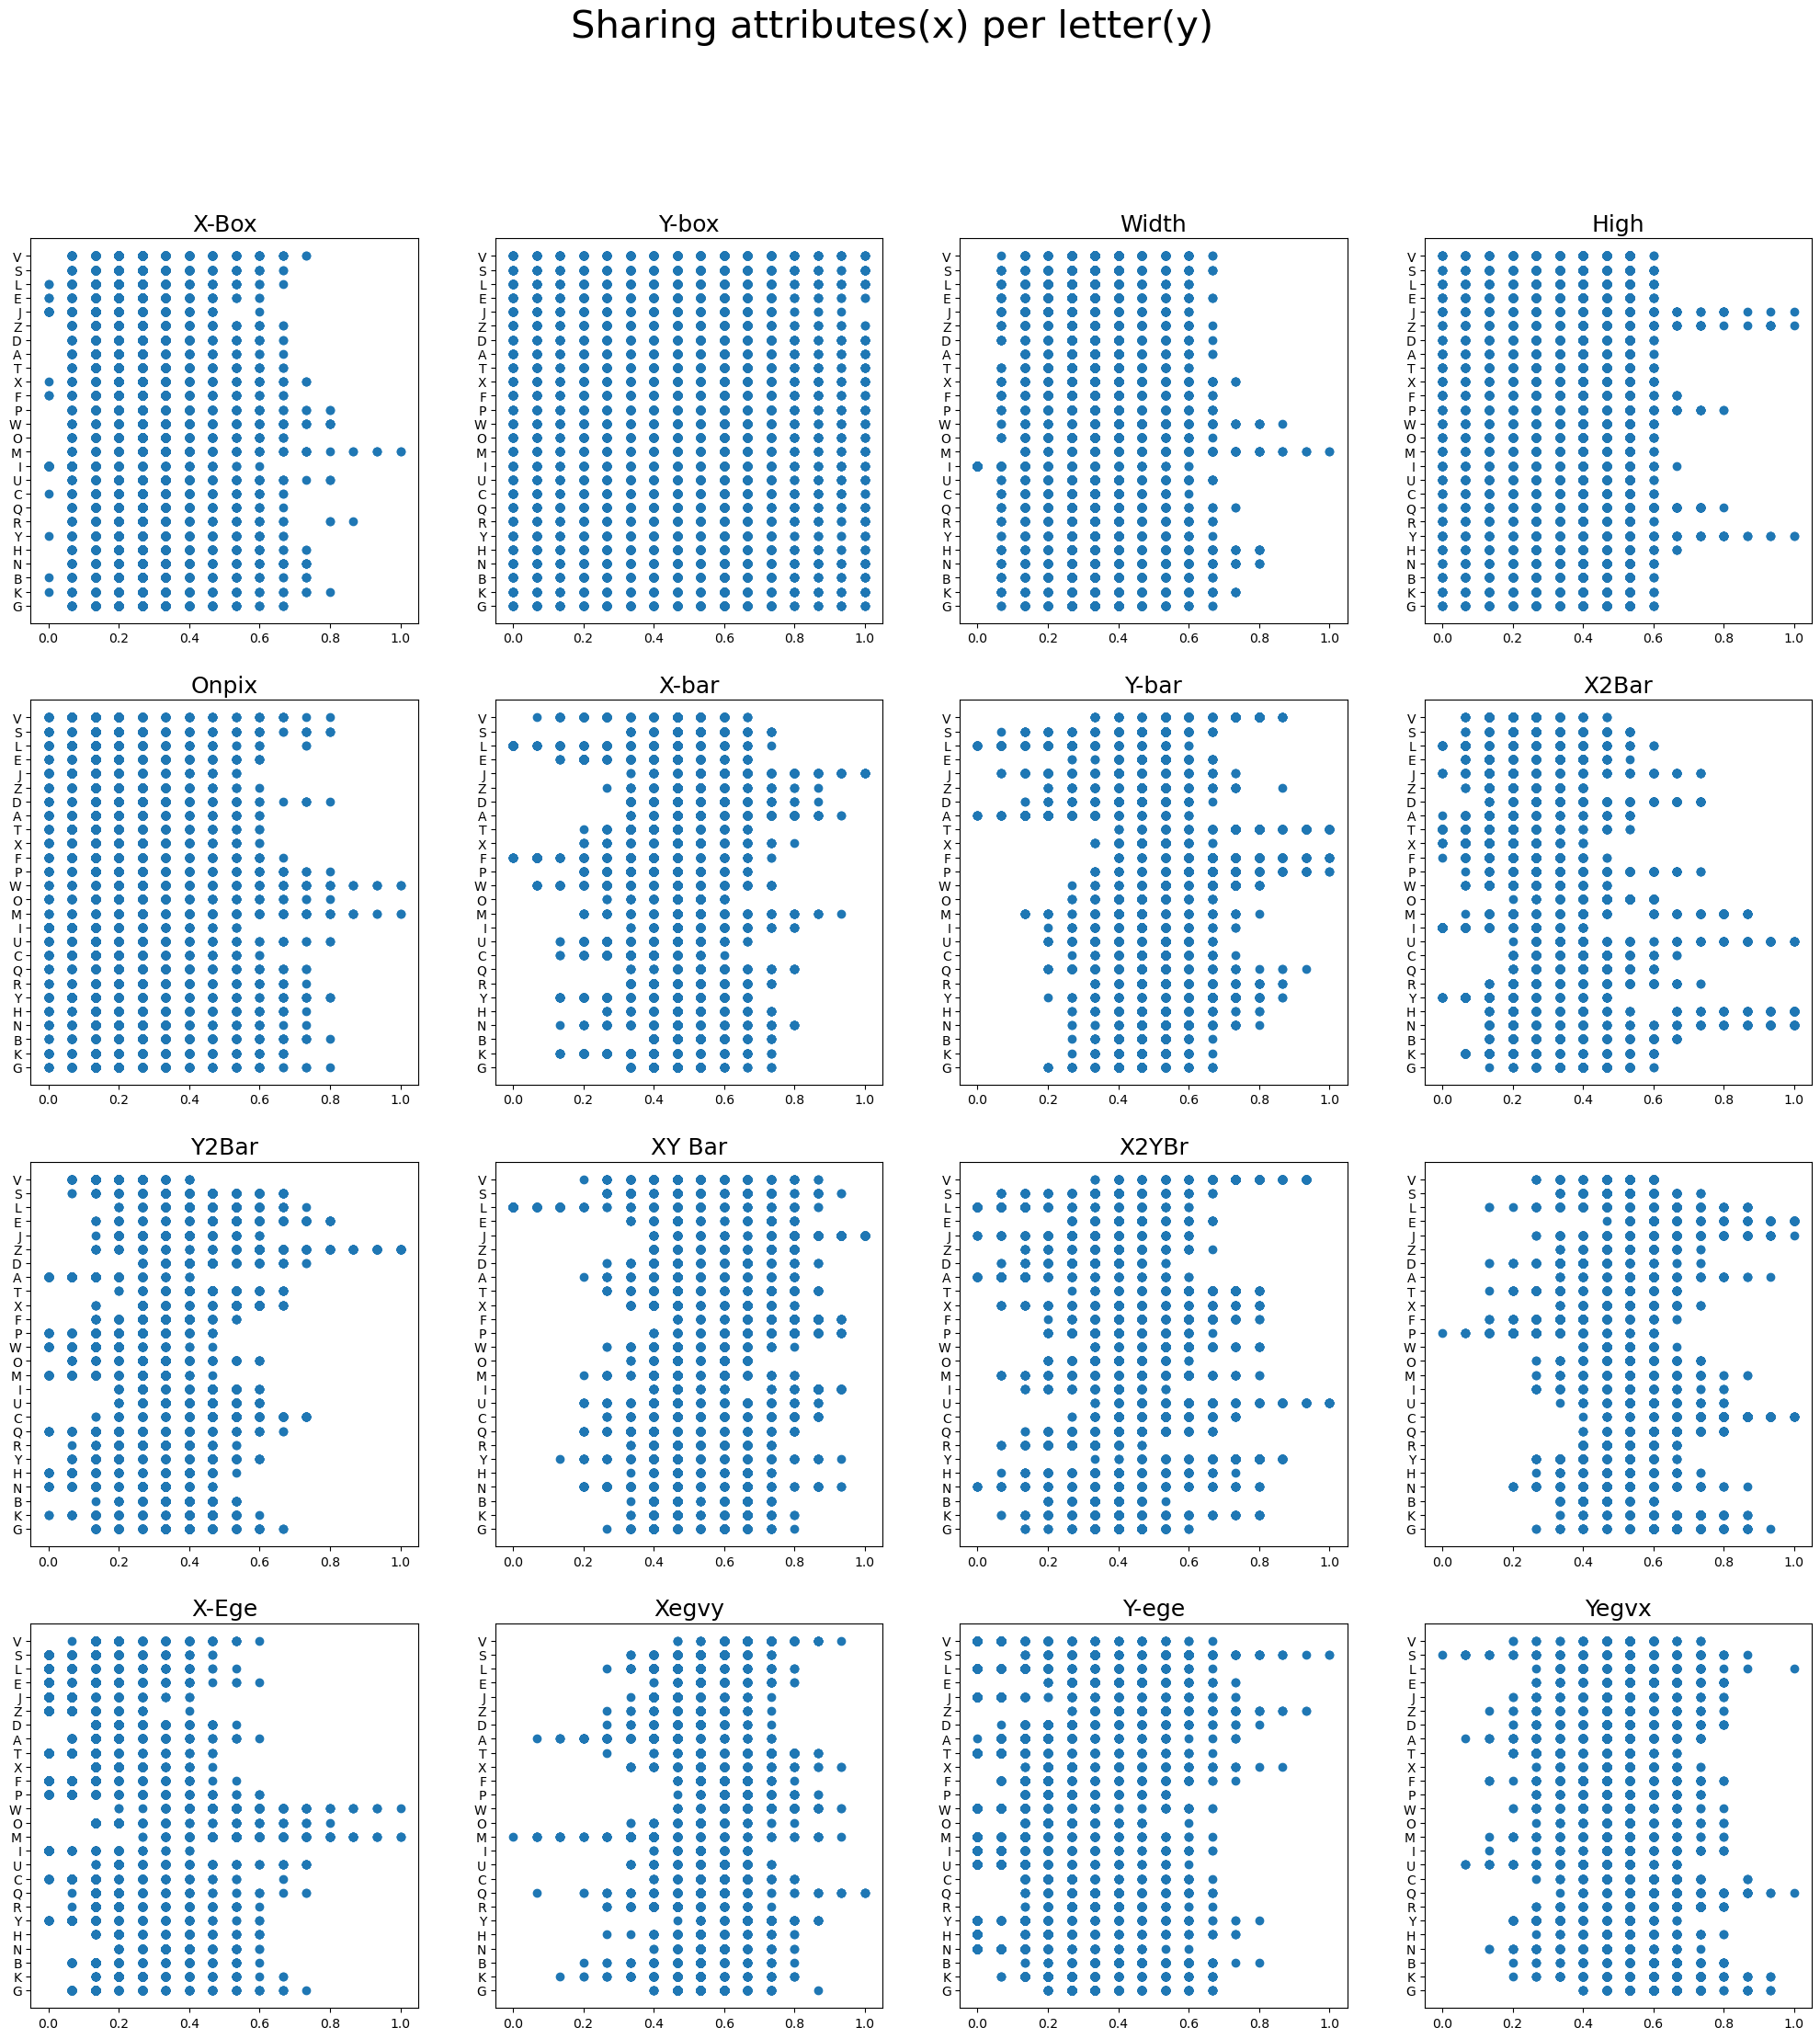

In [34]:
att_fig, (ax) = plt.subplots(4, 4, figsize=(25,25))
att_fig.suptitle('Sharing attributes(x) per letter(y)', fontsize=30)

#x-box
ax[0,0].scatter(X_train_s['x-box'], T_train)
ax[0,0].set_title('X-Box', fontsize=18)

#y-box
ax[0,1].scatter(X_train_s['y-box'], T_train)
ax[0,1].set_title('Y-box', fontsize=18)

#width
ax[0,2].scatter(X_train_s['width'], T_train)
ax[0,2].set_title('Width', fontsize=18)

#high
ax[0,3].scatter(X_train_s['high'], T_train)
ax[0,3].set_title('High', fontsize=18)

#onpix
ax[1,0].scatter(X_train_s['onpix'], T_train)
ax[1,0].set_title('Onpix', fontsize=18)

#x-bar
ax[1,1].scatter(X_train_s['x-bar'], T_train)
ax[1,1].set_title('X-bar', fontsize=18)

#y-bar
ax[1,2].scatter(X_train_s['y-bar'], T_train)
ax[1,2].set_title('Y-bar', fontsize=18)

#x2bar
ax[1,3].scatter(X_train_s['x2bar'], T_train)
ax[1,3].set_title('X2Bar', fontsize=18)

#y2bar
ax[2,0].scatter(X_train_s['y2bar'], T_train)
ax[2,0].set_title('Y2Bar', fontsize=18)

#xybar
ax[2,1].scatter(X_train_s['xybar'], T_train)
ax[2,1].set_title('XY Bar', fontsize=18)

#x2ybr
ax[2,2].scatter(X_train_s['x2ybr'], T_train)
ax[2,2].set_title('X2YBr', fontsize=18)

#xy2br
ax[2,3].scatter(X_train_s['xy2br'], T_train)
ax[3,3].set_title('XY2Br', fontsize=18)

#x-ege
ax[3,0].scatter(X_train_s['x-ege'], T_train)
ax[3,0].set_title('X-Ege', fontsize=18)

#xegvy
ax[3,1].scatter(X_train_s['xegvy'], T_train)
ax[3,1].set_title('Xegvy', fontsize=18)

#y-ege
ax[3,2].scatter(X_train_s['y-ege'], T_train)
ax[3,2].set_title('Y-ege', fontsize=18)

#yegvx
ax[3,3].scatter(X_train_s['yegvx'], T_train)
ax[3,3].set_title('Yegvx', fontsize=18)



#plt.savefig('att_fig.jpg)Z

[0.02461472 0.02485601 0.02610838 0.02144853 0.02987777 0.05682201
 0.07115344 0.08929627 0.09160258 0.07352848 0.08033392 0.08321918
 0.10532525 0.06862356 0.09749294 0.05569696]


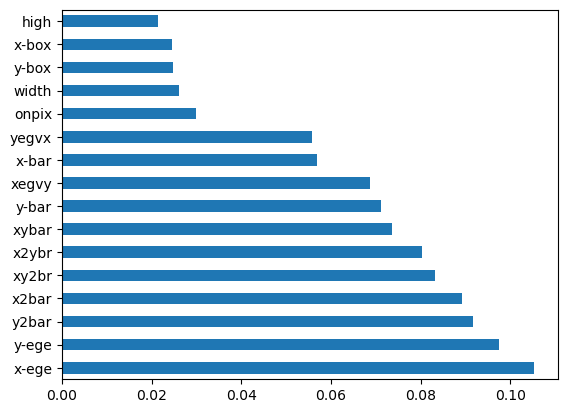

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_s,T_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train_s.columns)
feat_importances.nlargest(16).plot(kind='barh')
#plt.savefig('comparision.png')
plt.show()


# SVM Classifier :-

In [126]:
from sklearn import metrics
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_s,T_train)
T_pred = clf.predict(X_test_s)

In [127]:
print("Confusion Matrix: \n", metrics.confusion_matrix(T_pred, T_test))

Confusion Matrix: 
 [[182   0   0   0   0   0   0   0   0   5   0   0   0   0   3   0   5   0
    0   0   0   0   0   0   1   1]
 [  0 154   0  13   3   2   1   8   4   2   6   3   2   1   0   0   7  12
   26   2   0   3   0   4   0   2]
 [  0   0 144   0   4   0   5   0   1   0   2   6   0   0   2   0   1   0
    2   0   0   0   0   0   0   0]
 [  2   3   0 163   0   1   8  12   4  11   0   3   0   6  12   0   1   2
    0   0   0   0   0   4   2   2]
 [  0   0   5   0 145   2   0   0   0   0   0   3   0   0   0   0   1   0
    3   5   0   0   0   2   0   7]
 [  0   0   3   1   3 138   0   1   5   6   0   0   0   0   0   8   0   0
    6   0   0   0   0   1   3   0]
 [  0   1   8   0  16   4 138   1   0   0   0   5   0   0   0   7   4   0
    1   8   0   1   0   0   0   0]
 [  1   4   2   2   1   1   2  96   1   1   2   1   3   5  22   0   3   7
    0   6   5   6   0   4   1   1]
 [  0   0   0   0   0   0   0   0 170  11   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]

In [128]:
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(T_test, T_pred)))
print('Precision: {:.3f}'.format(metrics.precision_score(T_test, T_pred, average='weighted')))
print('Recall: {:.3f}'.format(metrics.recall_score(T_test, T_pred, average='weighted')))

Accuracy: 0.808
Precision: 0.820
Recall: 0.808


# F-beta Score


In [129]:
from sklearn.metrics import fbeta_score
print(fbeta_score(T_test, T_pred,average='weighted', beta=1))

0.8096948162163546


# Naive Bayes Classifier:-


In [130]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_s, T_train)
T_pred_nb = gnb.predict(X_test_s)

In [131]:
print("Confusion Matrix: \n", metrics.confusion_matrix(T_pred_nb, T_test))

Confusion Matrix: 
 [[172   0   0   1   0   0   3   2   1   0   0   1   3   1   2   0   4   0
    6   0   0   0   0   0   0   3]
 [  0 120   1  17   7   4   7  12   5   7   8   3   4   3   4   1   5  31
   43   2   0   3   2  12   0   0]
 [  0   0 134   0   3   0  29   0   0   0   0   2   0   0   1   0   0   0
    0   0   1   0   0   0   0   0]
 [  1  13   0 139   0   5   3  13  11  13   1   0   0   5  14   2   2  16
    3   3   0   0   0  11   1   0]
 [  0   0   6   0  63   0   0   0   2   0  19   1   0   0   0   0   0   0
    1   0   0   0   0   1   0   6]
 [  0   1   1   2   1 124   0   3   1   6   0   0   0   1   0   5   0   0
    1   8   0   0   0   0   8   0]
 [  0   1   6   0  28   4 108   2   0   0   6   6   0   0   7   5   4   0
    2   5   2   1   0   0   0   0]
 [  1   1   0   0   0   0   0  46   0   0   2   0   1  16   1   1   0   3
    1   4  10   0   2   0   0   0]
 [  0  12   0   6  10   0   2   2 157  11   2   0   0   0   8   0   3   1
   16   0   0   0   0  26   0  15]

In [132]:
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(T_test, T_pred_nb)))
print('Precision: {:.3f}'.format(metrics.precision_score(T_test, T_pred_nb, average='weighted')))
print('Recall: {:.3f}'.format(metrics.recall_score(T_test, T_pred_nb, average='weighted')))

Accuracy: 0.643
Precision: 0.662
Recall: 0.643


# F-Beta Score

In [133]:
print(fbeta_score(T_test, T_pred_nb,average='weighted', beta=1))

0.6395590216497914


# Random Forest Classifier(Decision Tree Based) :-

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(max_depth=16, random_state=0)
clf_r.fit(X_train_s,T_train)
T_pred_rf = clf_r.predict(X_test_s) 

In [135]:
print("Confusion Matrix: \n", metrics.confusion_matrix(T_pred_rf, T_test))

Confusion Matrix: 
 [[202   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0 166   0   3  21   3   4   9   3   4   5   6   4   0  31   1   6  12
   38   2   0   3   0  16   0   9]
 [  1   0 167   0   2   0   2   0   0   0   0   1   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   2   0 179   0   0   4  17   0   3   1   0   0   6  18   0   0   6
    0   1   1   0   0   3   0   2]
 [  0   1   2   0 163   1   1   0   1   0   0   2   0   0   0   1   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   2   0   0 158   0   1   3   2   0   0   0   0   0   4   0   1
    2   3   0   0   0   0   0   0]
 [  0   0   4   0   3   0 182   3   0   0   1   2   0   0   2   1   0   0
    0   1   0   2   1   0   0   0]
 [  0   0   0   2   1   1   0 118   0   0   4   0   0   1   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 182   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   1]

In [136]:
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(T_test, T_pred_rf)))
print('Precision: {:.3f}'.format(metrics.precision_score(T_test, T_pred_rf, average='weighted')))
print('Recall: {:.3f}'.format(metrics.recall_score(T_test, T_pred_rf, average='weighted')))

Accuracy: 0.901
Precision: 0.920
Recall: 0.901


# F-Beta Score

In [137]:
print(fbeta_score(T_test, T_pred_rf,average='weighted', beta=1))

0.9047966798993683
